<a href="https://colab.research.google.com/github/Sully001/Heart-Disease-Repo_Final/blob/main/Heart_Disease_Final_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
pip install ucimlrepo

In [290]:
import warnings
warnings.filterwarnings('ignore')

from ucimlrepo import fetch_ucirepo, list_available_datasets

# for data pre-processing
import pandas as pd
import numpy as np

# for calculating the z-score
from scipy import stats

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting data
from sklearn.model_selection import train_test_split

# for cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# for data normalisation of numeric variables
from sklearn.preprocessing import MinMaxScaler

# the machine learining algo's
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC  # For Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # For Random Forest



# for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# for label encoding
from sklearn.preprocessing import LabelEncoder

# 1. Import Libraries for Project

In [291]:
# fetch dataset of Cleveland UCI Dataset
heart_cleveland = fetch_ucirepo(id=45).data.original

In [292]:
heart_cleveland.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# 2. Data Pre-Processing and Cleaning

In [293]:
# Initially checking the data types of all of the features
heart_cleveland.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [294]:
# renaming the column names to be more coherent
heart_cleveland.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
                          'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'maximum_heart_rate',
                          'exercise_induced_angina', 'st_depression', 'st_slope', 'flouroscopy_coloured_vessels', 'thallium_test', 'target']

It's possible that the categorical/nominal features may contain values other than in the description or that are not Nan. So, you must check for them and handle them accordingly.

As we can see all nominal features are fine except "flouroscopy coloured vessels" and "thal test" as theu contain missing values.

----------------------------------------------------------------------------------------
I will encode the feature instances to make them more coherent rather than being numbers which are hard to interpret.
As well as encoding all of the nominal features to be explicitly categorical. This is to ensure that categorical data does not get mistakenly used in any calculations and is interpolated.

In [295]:
# Changing the numbered values into text, for better readability
heart_cleveland['chest_pain_type'][heart_cleveland['chest_pain_type'] == 1] = 'typical angina'
heart_cleveland['chest_pain_type'][heart_cleveland['chest_pain_type'] == 2] = 'atypical angina'
heart_cleveland['chest_pain_type'][heart_cleveland['chest_pain_type'] == 3] = 'non-anginal pain'
heart_cleveland['chest_pain_type'][heart_cleveland['chest_pain_type'] == 4] = 'asymptomatic'

heart_cleveland['resting_ecg'][heart_cleveland['resting_ecg'] == 0] = 'normal'
heart_cleveland['resting_ecg'][heart_cleveland['resting_ecg'] == 1] = 'st-t wave abnormality'
heart_cleveland['resting_ecg'][heart_cleveland['resting_ecg'] == 2] = 'left ventricular hypertrophy'

heart_cleveland['st_slope'][heart_cleveland['st_slope'] == 1] = 'upsloping'
heart_cleveland['st_slope'][heart_cleveland['st_slope'] == 2] = 'flat'
heart_cleveland['st_slope'][heart_cleveland['st_slope'] == 3] = 'downsloping'


heart_cleveland['sex'] = heart_cleveland.sex.apply(lambda x:'male' if x==1 else 'female')

In [296]:
# Converting each of the nominal types into categorical variables
heart_cleveland['chest_pain_type'] = heart_cleveland['chest_pain_type'].astype('category')

heart_cleveland['resting_ecg'] = heart_cleveland['resting_ecg'].astype('category')

heart_cleveland['st_slope'] = heart_cleveland['st_slope'].astype('category')

heart_cleveland['thallium_test'] = heart_cleveland['thallium_test'].astype('category')

heart_cleveland['sex'] = heart_cleveland['sex'].astype('category')

heart_cleveland['fasting_blood_sugar'] = heart_cleveland['fasting_blood_sugar'].astype('category')

heart_cleveland['target'] = heart_cleveland['target'].astype('category')

heart_cleveland['exercise_induced_angina'] = heart_cleveland['exercise_induced_angina'].astype('category')

heart_cleveland['flouroscopy_coloured_vessels'] = heart_cleveland['flouroscopy_coloured_vessels'].astype('category')


In [297]:
# Checking to make sure nominal features are categorical & numerical features are integers
heart_cleveland.dtypes

age                                int64
sex                             category
chest_pain_type                 category
resting_blood_pressure             int64
cholesterol                        int64
fasting_blood_sugar             category
resting_ecg                     category
maximum_heart_rate                 int64
exercise_induced_angina         category
st_depression                    float64
st_slope                        category
flouroscopy_coloured_vessels    category
thallium_test                   category
target                          category
dtype: object

In [298]:
# Checking unique values for all the categorical/nominal variables

print("Sex: " + str(heart_cleveland['sex'].unique()) + "\n")
print("Chest pain type: " + str(heart_cleveland['chest_pain_type'].unique()) + "\n")
print("Fasting Blood Sugar: " + str(heart_cleveland['fasting_blood_sugar'].unique()) + "\n")

print("Exercise Induced Angina: " + str(heart_cleveland['exercise_induced_angina'].unique()) + "\n")
print("ST Slope: " + str(heart_cleveland['st_slope'].unique()) + "\n")

print("Flouroscopy Coloured Vessels: " + str(heart_cleveland['flouroscopy_coloured_vessels'].unique()) + "\n")
print("Thal Test: " + str(heart_cleveland['thallium_test'].unique()) + "\n")

print("Target: " + str(heart_cleveland['target'].unique()) + "\n")

Sex: ['male', 'female']
Categories (2, object): ['female', 'male']

Chest pain type: ['typical angina', 'asymptomatic', 'non-anginal pain', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal pain', 'typical angina']

Fasting Blood Sugar: [1, 0]
Categories (2, int64): [0, 1]

Exercise Induced Angina: [0, 1]
Categories (2, int64): [0, 1]

ST Slope: ['downsloping', 'flat', 'upsloping']
Categories (3, object): ['downsloping', 'flat', 'upsloping']

Flouroscopy Coloured Vessels: [0.0, 3.0, 2.0, 1.0, NaN]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

Thal Test: [6.0, 3.0, 7.0, NaN]
Categories (3, float64): [3.0, 6.0, 7.0]

Target: [0, 2, 1, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]



--------------------------------------------------------------------------------
Just to confirm i will sum the number of missing values to see how many there are.

In [299]:
# sum of all the number of missing values in each column,
heart_cleveland.isnull().sum()

age                             0
sex                             0
chest_pain_type                 0
resting_blood_pressure          0
cholesterol                     0
fasting_blood_sugar             0
resting_ecg                     0
maximum_heart_rate              0
exercise_induced_angina         0
st_depression                   0
st_slope                        0
flouroscopy_coloured_vessels    4
thallium_test                   2
target                          0
dtype: int64

-----------------------------------------------------------------------------------------
I will impute these features using the mode as they are categorical and least likely to affect the distribution of classes.

In [300]:
# flouroscopy and thallium are categorical so we impute with mode
heart_cleveland['flouroscopy_coloured_vessels'] = heart_cleveland['flouroscopy_coloured_vessels'].fillna(heart_cleveland['flouroscopy_coloured_vessels'].mode().iloc[0])

heart_cleveland['thallium_test'] = heart_cleveland['thallium_test'].fillna(heart_cleveland['thallium_test'].mode().iloc[0])


---------------------------------------------------------------------------------------
I will also check for any duplicated rows

In [301]:
# there are no duplicate rows
heart_cleveland[heart_cleveland.duplicated()].shape

(0, 14)

In [302]:
heart_cleveland.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,st_depression,st_slope,flouroscopy_coloured_vessels,thallium_test,target
0,63,male,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0.0,6.0,0
1,67,male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,flat,3.0,3.0,2
2,67,male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,flat,2.0,7.0,1
3,37,male,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0.0,3.0,0
4,41,female,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0.0,3.0,0


# 3. Encoding the target variable to a binary class
I will be changing the target class to be binary. Right now 0 = no prescence and 1-4 mean a varying presence of heart disease. I will encode any presence as being 1.

In [303]:
heart_cleveland['target'].value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [304]:
# lambda function that changes values [1, 2, 3, 4] into 1 and otherwise to 0
heart_cleveland['target'] = heart_cleveland['target'].apply(lambda x: 1 if x in [1, 2, 3, 4] else x)

# changing the target feature to be categorical
heart_cleveland['target'] = heart_cleveland['target'].astype('category')

# checking the distribution of the target after encoding
print(heart_cleveland['target'].value_counts())

target
0    164
1    139
Name: count, dtype: int64


# 5. Exploratory Data Analysis

In [305]:
# checking the rows and number of features
heart_cleveland.shape

(303, 14)

In [306]:
heart_cleveland.describe()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [307]:
# summary statistics of categorical columns
heart_cleveland.describe(include = ['category'])

,sex,chest_pain_type,fasting_blood_sugar,resting_ecg,exercise_induced_angina,st_slope,flouroscopy_coloured_vessels,thallium_test,target
count,303,303,303,303,303,303,303.0,303.0,303
unique,2,4,2,3,2,3,4.0,3.0,2
top,male,asymptomatic,0,normal,0,upsloping,0.0,3.0,0
freq,206,144,258,151,204,142,180.0,168.0,164


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'maximum_heart_rate'}>],
       [<Axes: title={'center': 'st_depression'}>, <Axes: >]],
      dtype=object)

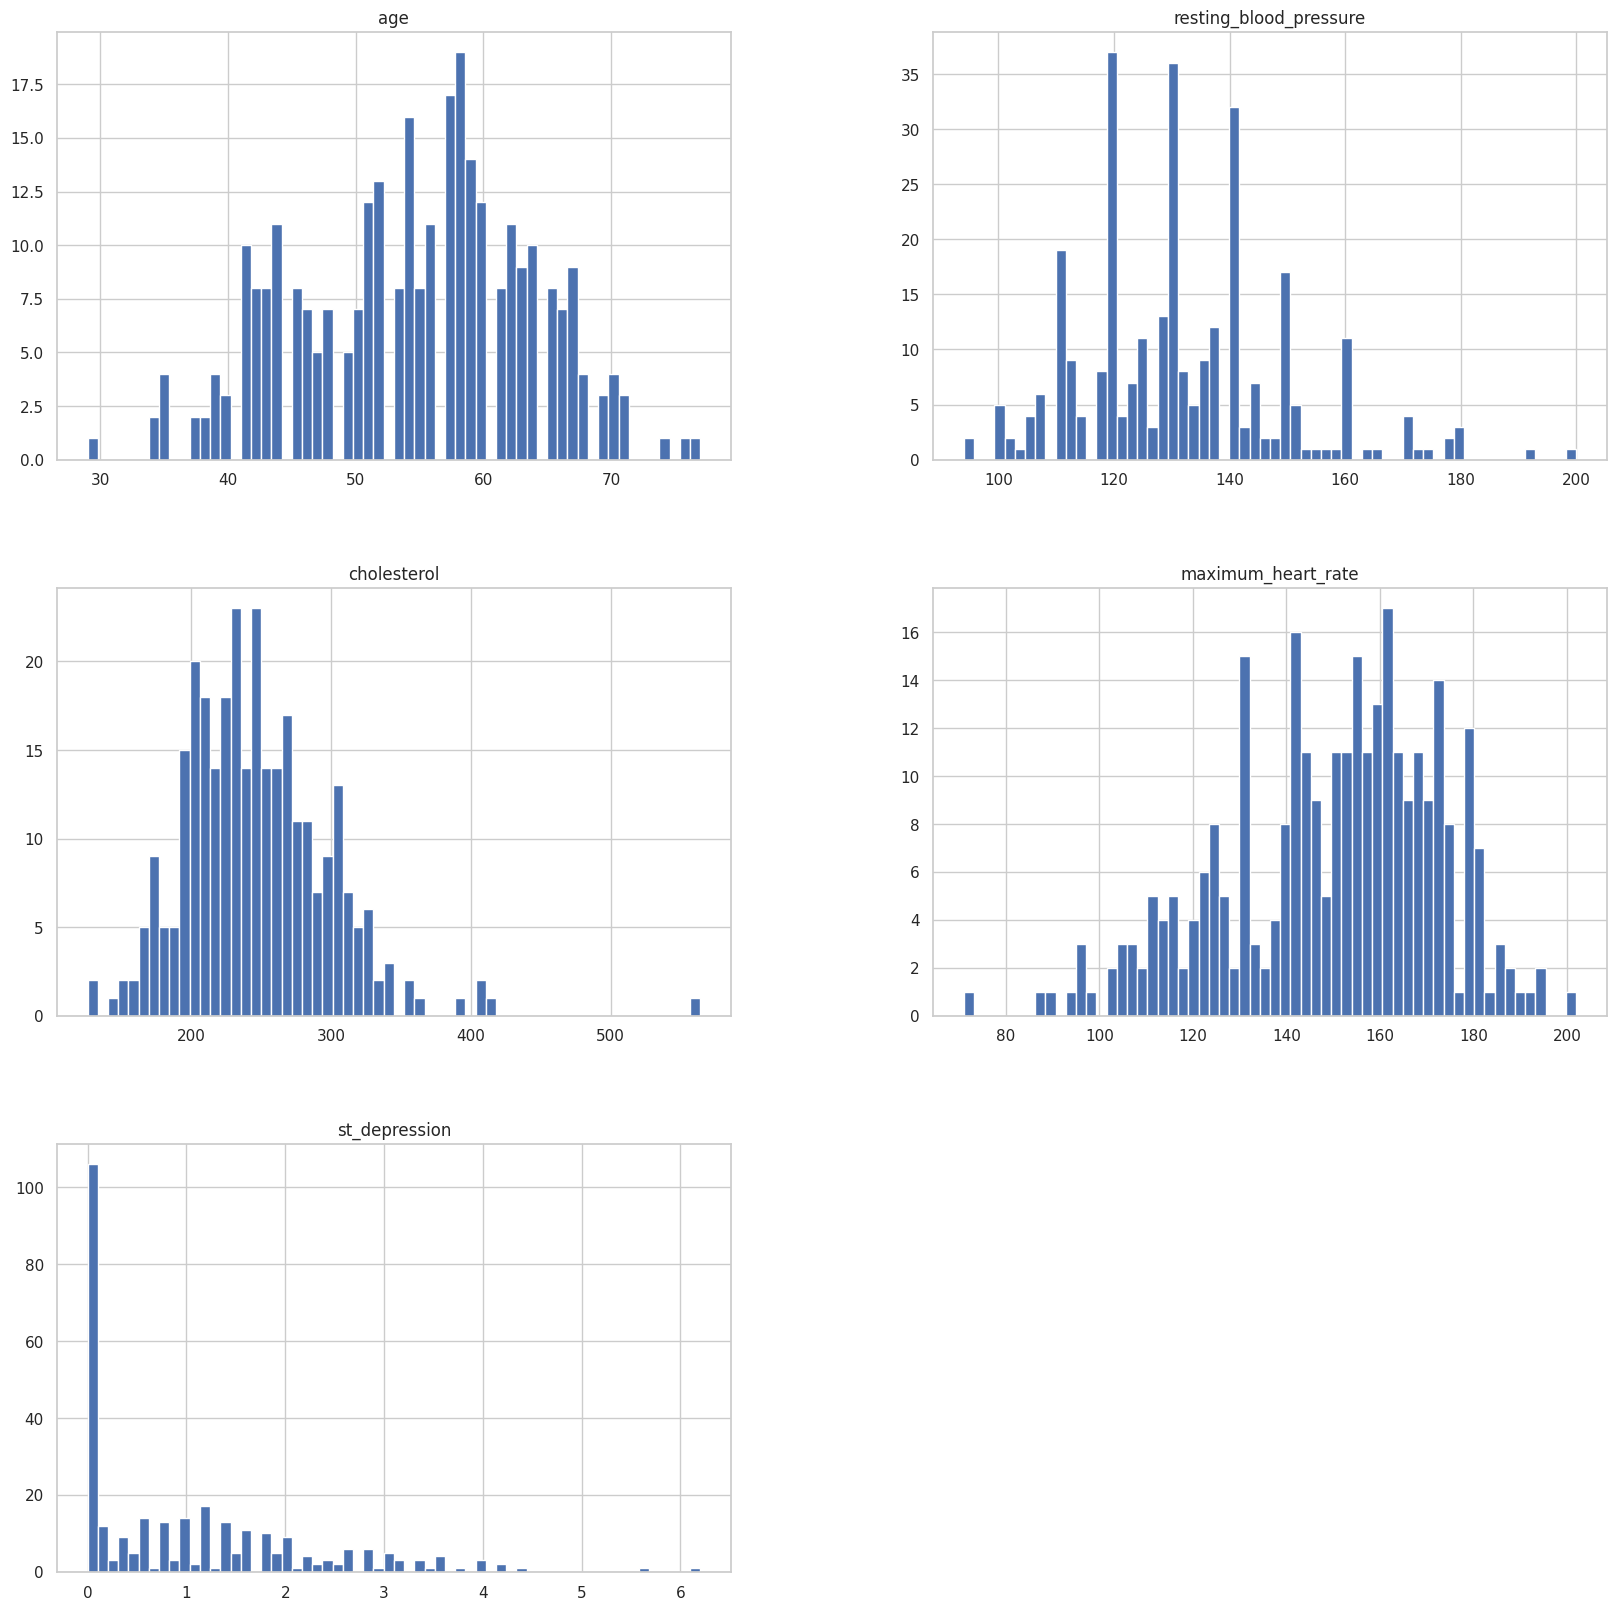

In [308]:
# shows how many times a value appears in the dataset
heart_cleveland.hist(bins=60, figsize=(20,20))

----------------------------------------------------------------------------
### What is the Distribution of Target Variable (Heart Disease)
We can see that the overall distribution of the target class is only slightly imbalanced. The dataset is not dominated by one only.

Distribution of Target Class: target
0    164
1    139
Name: count, dtype: int64


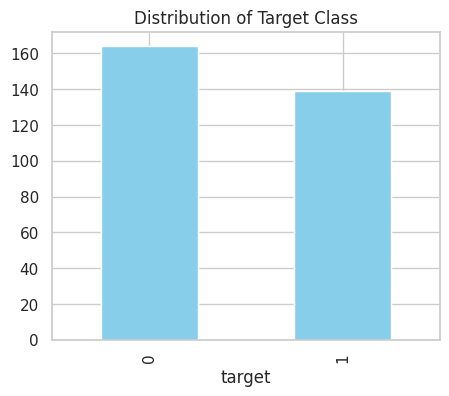

In [309]:
target_counts = heart_cleveland['target'].value_counts()

# Plotting the bar chart
target_counts.plot(kind='bar')
target_counts.plot(kind='bar', color='skyblue', figsize=(5, 4), title='Distribution of Target Class')

print("Distribution of Target Class: " + str(heart_cleveland['target'].value_counts()))

### What is the distribution of age and sex?
As we can see that the data is unbalanced when it comes to the distribution of males to females. There is a clear majority. Also the ages tend to be a lot older which seems to be in line with the age demographic that is most affected by heart disease/cardiovascular diseases. But this could affect the predictive capability of detecting heart disease in women. ref: https://www.nia.nih.gov/health/heart-health/heart-health-and-aging

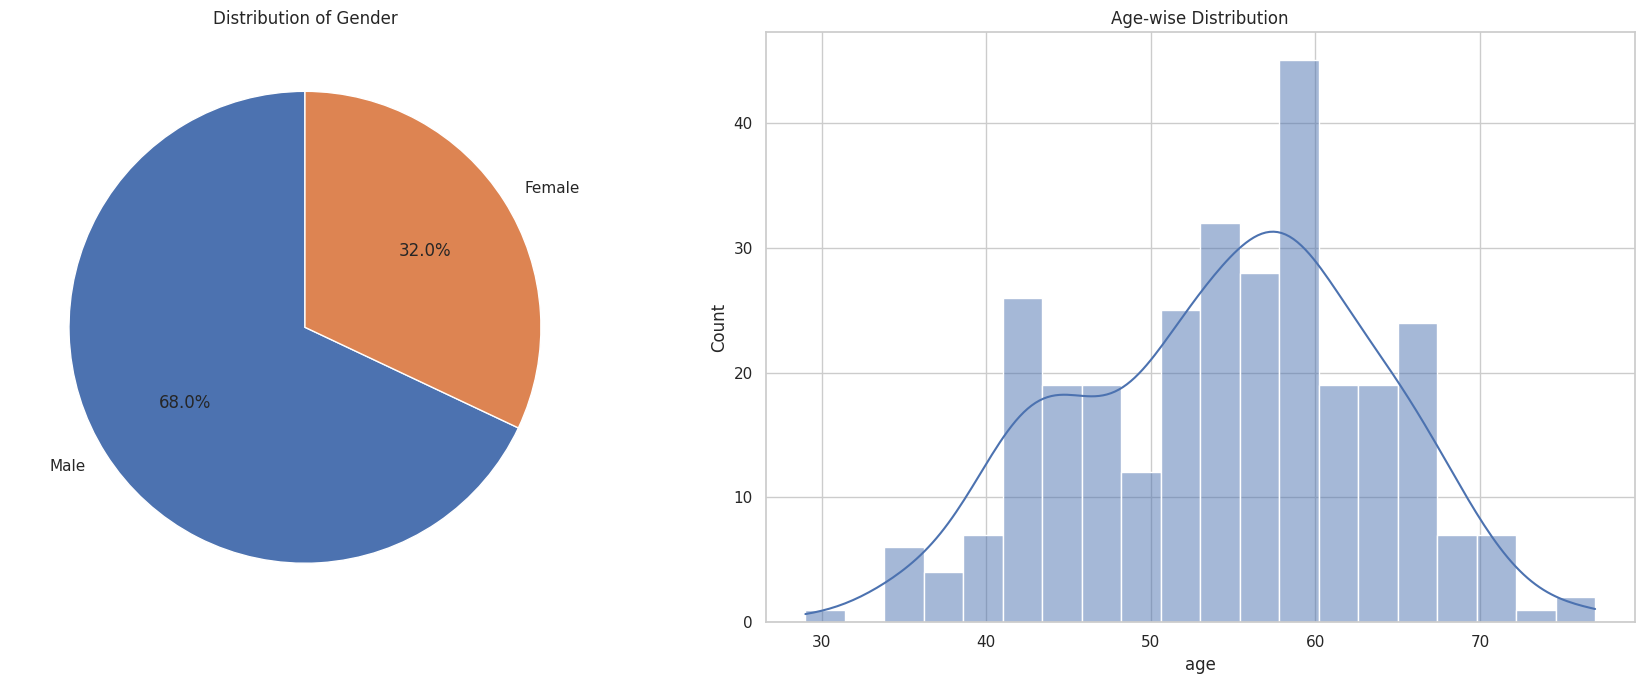

In [310]:
sns.set(style="whitegrid")

# Creating the figure and the axes (subplots)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Distribution of Sex
sex_counts = heart_cleveland['sex'].value_counts()
sex_labels = ['Male', 'Female']
axes[0].pie(sex_counts, labels=sex_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Gender')

# Plot 2: Distribution of Age
sns.histplot(heart_cleveland['age'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Age-wise Distribution')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


------------------------------------------------------------------------------------------
## Comparing those with heart disease to those without, with respect to age and sex.
Are there any common characteristics in those that have heart disease and what are their differences to those that do not?

In normal patients the age distribution seems to have a normal distribution and sex is somewhat balanced. However, in heart disease presence it's more men and older, this reflects current research as older men tend to be more at risk.

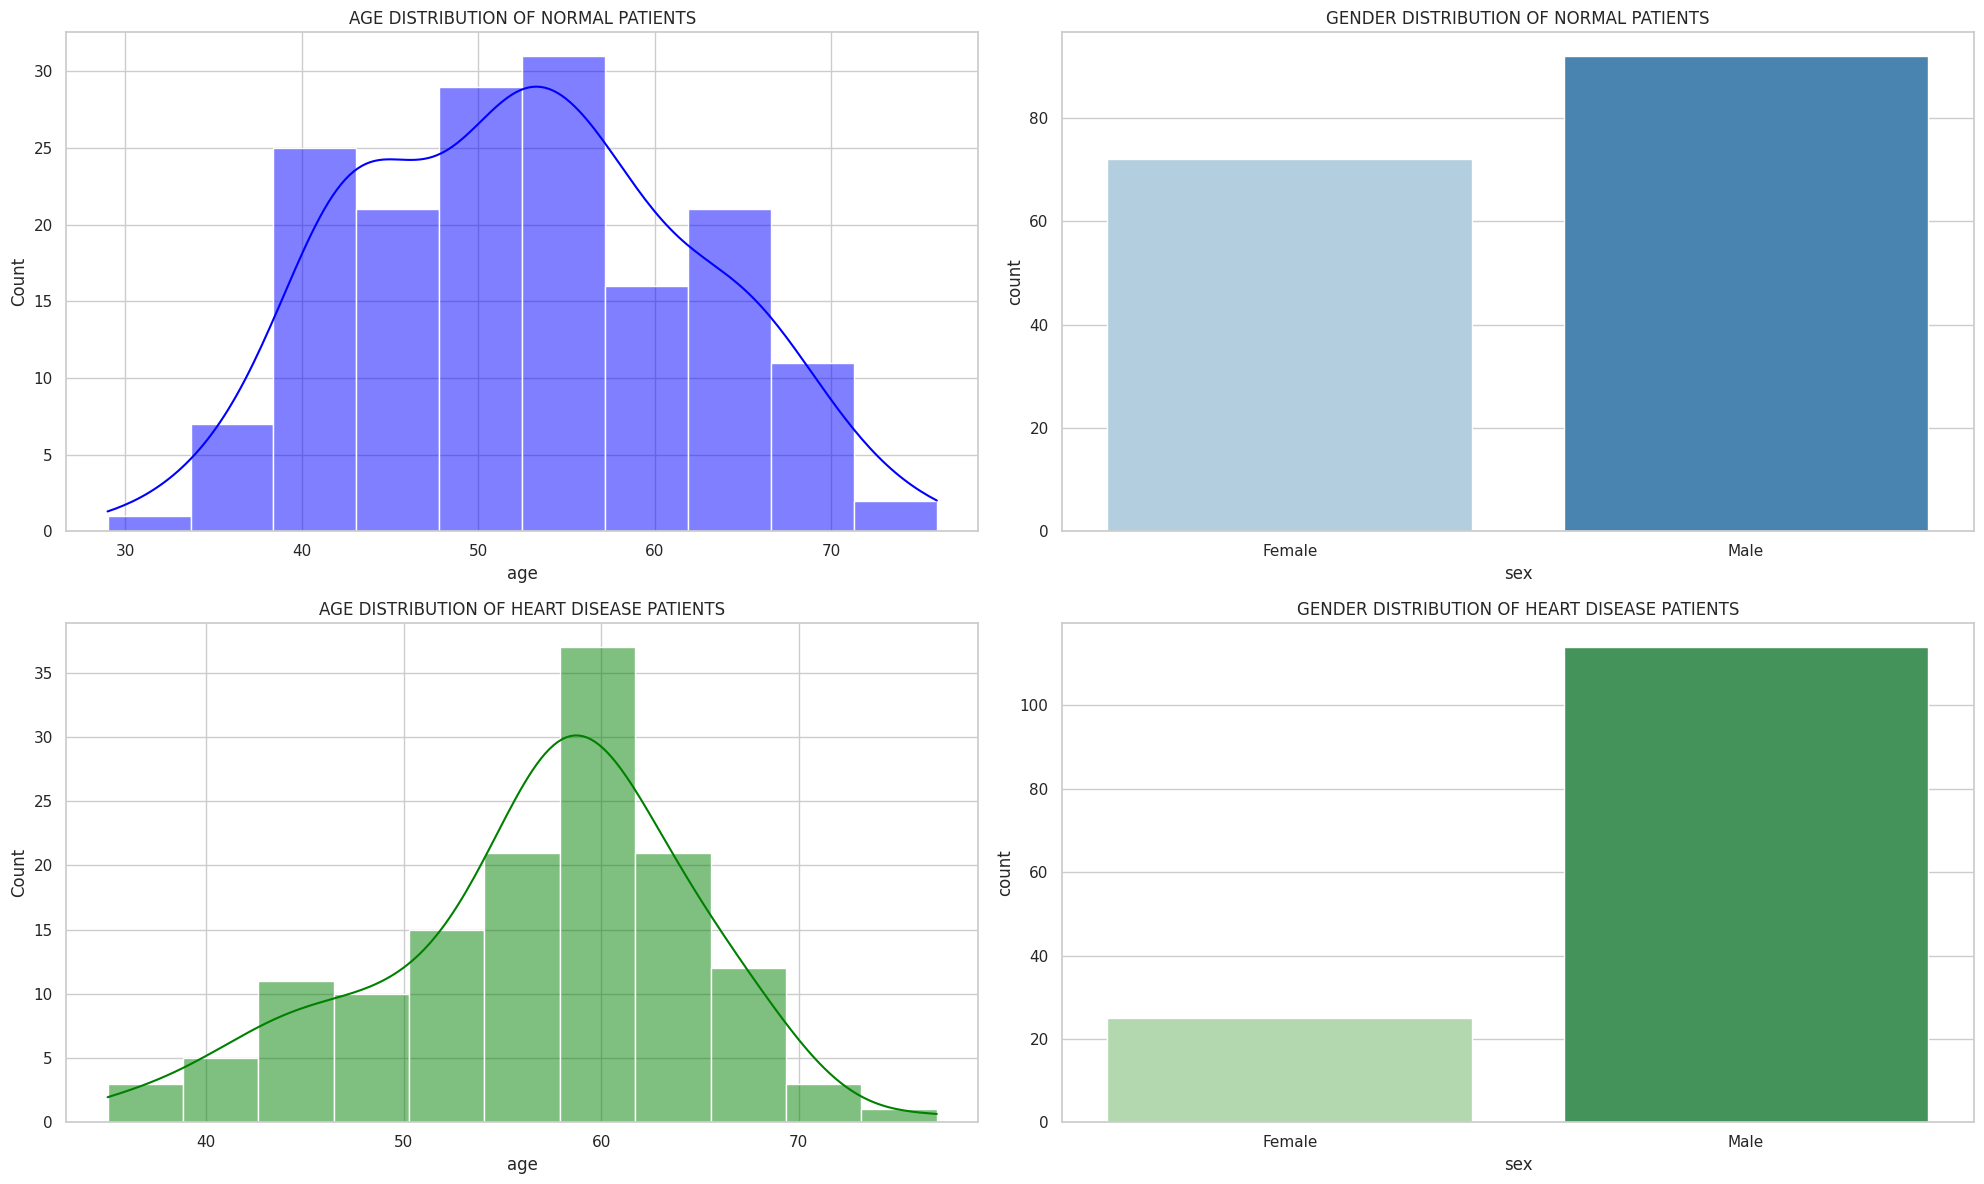

In [311]:
normal_patients = heart_cleveland[heart_cleveland['target'] == 0]
heart_disease_patients = heart_cleveland[heart_cleveland['target'] == 1]

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot the age distribution of normal patients
sns.histplot(normal_patients['age'], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title('AGE DISTRIBUTION OF NORMAL PATIENTS')

# Plot the sex distribution of normal patients
sns.countplot(x='sex', data=normal_patients, ax=axes[0, 1], palette="Blues")
axes[0, 1].set_title('GENDER DISTRIBUTION OF NORMAL PATIENTS')
axes[0, 1].set_xticklabels(['Female', 'Male']) # Make sure to label these correctly based on your data encoding

# Plot the age distribution of heart disease patients
sns.histplot(heart_disease_patients['age'], kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS')

# Plot the sex distribution of heart disease patients
sns.countplot(x='sex', data=heart_disease_patients, ax=axes[1, 1], palette="Greens")
axes[1, 1].set_title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS')
axes[1, 1].set_xticklabels(['Female', 'Male']) # Make sure to label these correctly based on your data encoding

# Final layout settings
plt.tight_layout()
plt.show()

## Checking the types of chest pain in normal and heart disease patients

Based on the insights here, it seems that "asymptomatic" angina correlates very highly with heart disease patients as it is by far the largest chest pain type.

In normal patients it's non anginal pain.

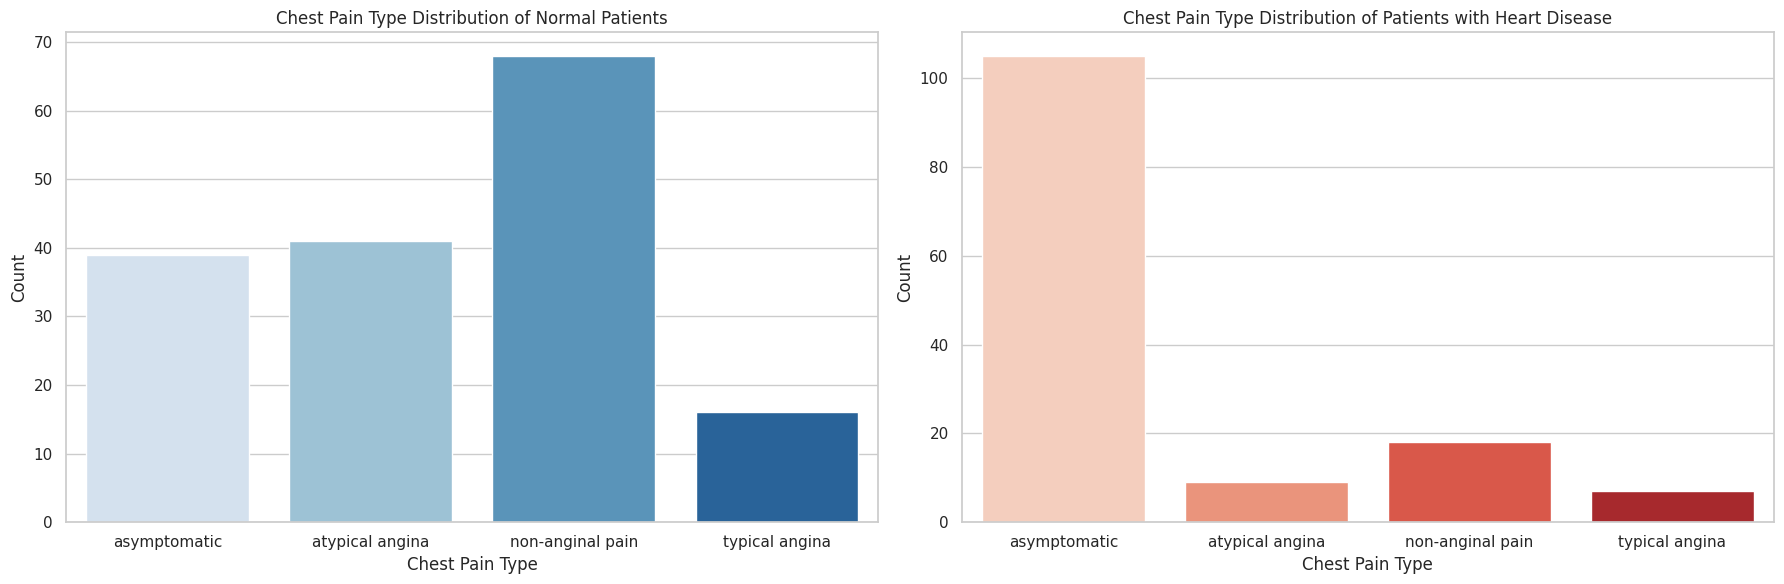

In [312]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for normal patients
sns.countplot(x='chest_pain_type', data=normal_patients, ax=axes[0], palette="Blues")
axes[0].set_title('Chest Pain Type Distribution of Normal Patients')
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Count')

# Bar chart for patients with heart disease
sns.countplot(x='chest_pain_type', data=heart_disease_patients, ax=axes[1], palette="Reds")
axes[1].set_title('Chest Pain Type Distribution of Patients with Heart Disease')
axes[1].set_xlabel('Chest Pain Type')
axes[1].set_ylabel('Count')

# Final layout settings
plt.tight_layout()
plt.show()

In [313]:
# Getting the counts for the heart disease patients, asymptomatic is overwhelming majority
heart_disease_patients['chest_pain_type'].value_counts().sort_index()

chest_pain_type
asymptomatic        105
atypical angina       9
non-anginal pain     18
typical angina        7
Name: count, dtype: int64

### Looking at Seaborn Pairplot of Various Numerical features against the Target Class

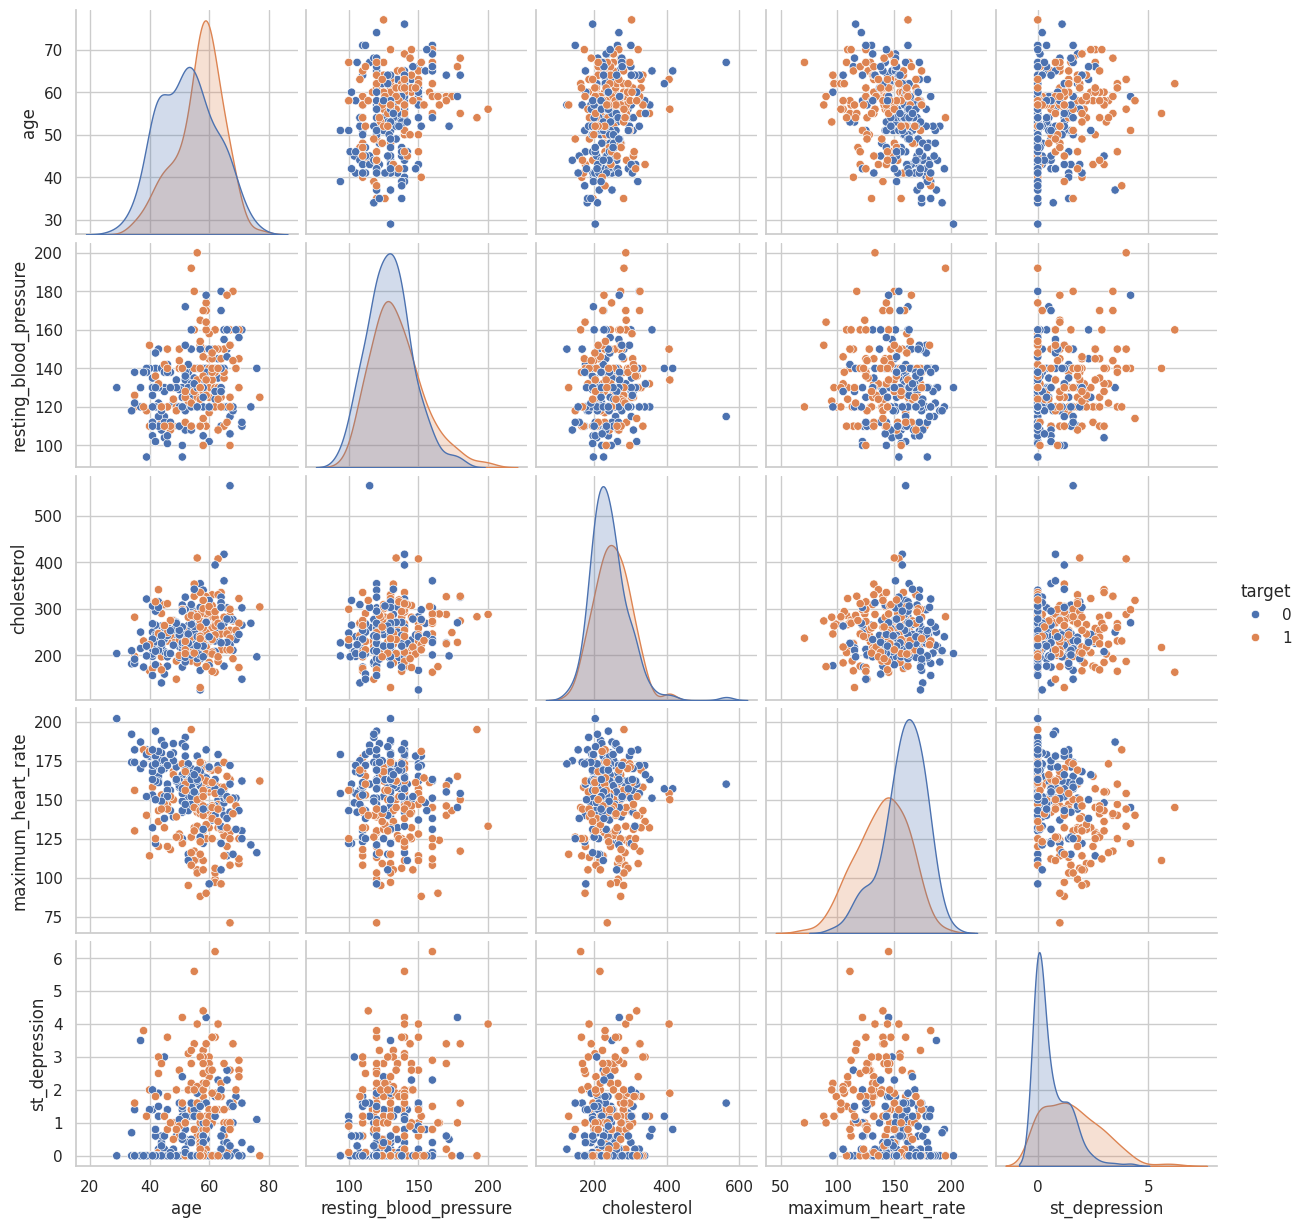

In [314]:
sns.pairplot(heart_cleveland, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol', 'maximum_heart_rate', 'st_depression'] )

# Outlier Detection

In [315]:
numeric_columns = heart_cleveland.select_dtypes(include="number").columns
df_numeric = heart_cleveland[numeric_columns]
df_numeric.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4


In [316]:
# calculating zscore of numeric columns in the dataset
zscores = np.abs(stats.zscore(df_numeric))
zscores.head(5)

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression
0,0.948726,0.757525,0.264900,0.017197,1.087338
1,1.392002,1.611220,0.760415,1.821905,0.397182
2,1.392002,0.665300,0.342283,0.902354,1.346147
3,1.932564,0.096170,0.063974,1.637359,2.122573
4,1.489288,0.096170,0.825922,0.980537,0.310912


In [317]:
# Defining threshold for filtering outliers
threshold = 3
np.where(zscores > threshold)

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245]),
 array([2, 4, 2, 4, 1, 2, 2, 1, 3]))

In [318]:
# filtering outliers retaining only those data points which are below threshhold
heart_cleveland = heart_cleveland[(zscores < threshold).all(axis=1)]

In [319]:
# checking shape to see how many rows have been removed
heart_cleveland.shape

(294, 14)

## Checking the distribution of features after removing outliers

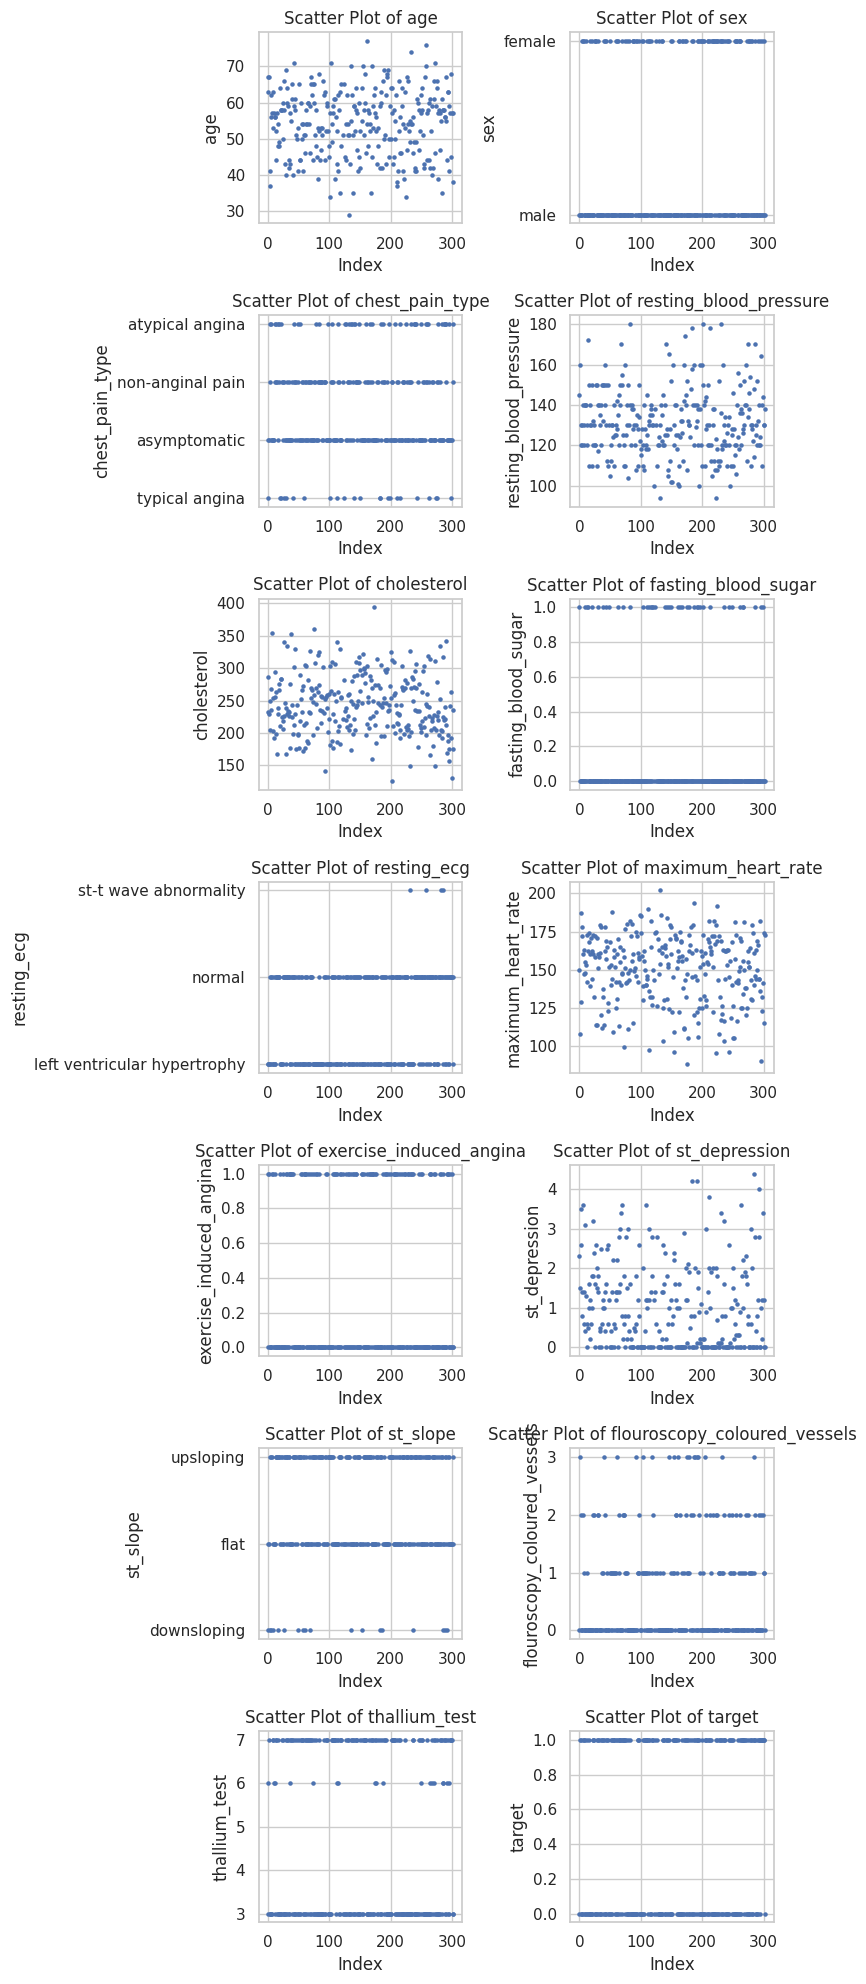

In [320]:
# Define the number of columns and rows for the subplots grid
num_cols = 2
num_rows = 7

# Create subplots with a 2x7 grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 20))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Loop through columns and create scatter plots
for i, column in enumerate(heart_cleveland.columns):
    axes[i].scatter(x=heart_cleveland.index, y=heart_cleveland[column], s=5)
    axes[i].set_title(f'Scatter Plot of {column}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(column)

# Adjust layout to print in a grid like manner
plt.tight_layout()

# Show the plot
plt.show()

-----------------------------------------------------------------------------------------
### One-Hot Encoding of the Categorical Features

In [321]:
# one-hot encoding
hd = pd.get_dummies(heart_cleveland.drop('target', axis=1)).join(heart_cleveland['target'])
hd.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,st_slope_flat,st_slope_upsloping,flouroscopy_coloured_vessels_0.0,flouroscopy_coloured_vessels_1.0,flouroscopy_coloured_vessels_2.0,flouroscopy_coloured_vessels_3.0,thallium_test_3.0,thallium_test_6.0,thallium_test_7.0,target
0,63,145,233,150,2.3,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,0
1,67,160,286,108,1.5,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,1
2,67,120,229,129,2.6,False,True,True,False,False,...,True,False,False,False,True,False,False,False,True,1
3,37,130,250,187,3.5,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,0
4,41,130,204,172,1.4,True,False,False,True,False,...,False,True,True,False,False,False,True,False,False,0


------------------------------------------------------------------------------------------
### There are now many more features, first we will get baseline model performance and later try some dimensionality reduction.

In [322]:
hd.shape

(294, 29)

# Train and Test Split

In [323]:
# split into x and y
X = hd.drop('target', axis=1)  # Features
y = hd['target']  # Target

In [324]:
# Splitting data 70/30 (train/test)
# Shuffle = true: shuffles the data set before splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

### Looking at the distribution of the target class in test & train set

In [325]:
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
target
0    115
1     90
Name: count, dtype: int64
Distribution of target variable in test set
target
0    47
1    42
Name: count, dtype: int64


### Scale both of the train and test sets

In [326]:
scaler = MinMaxScaler()
X_train[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']] = scaler.fit_transform(X_train[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']])
X_train.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,st_slope_downsloping,st_slope_flat,st_slope_upsloping,flouroscopy_coloured_vessels_0.0,flouroscopy_coloured_vessels_1.0,flouroscopy_coloured_vessels_2.0,flouroscopy_coloured_vessels_3.0,thallium_test_3.0,thallium_test_6.0,thallium_test_7.0
120,0.463415,0.418605,0.485075,0.543860,0.000000,False,True,True,False,False,...,False,False,True,False,False,True,False,False,False,True
224,0.829268,0.162791,0.533582,0.710526,0.409091,True,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
99,0.463415,0.325581,0.358209,0.859649,0.000000,False,True,True,False,False,...,False,False,True,True,False,False,False,True,False,False
18,0.463415,0.418605,0.555970,0.447368,0.045455,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,False
176,0.560976,0.162791,0.399254,0.517544,0.022727,False,True,True,False,False,...,False,False,True,False,False,False,True,False,False,True


In [327]:
X_test[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']] = scaler.transform(X_test[['age','resting_blood_pressure','cholesterol','maximum_heart_rate','st_depression']])
X_test.head()

,age,resting_blood_pressure,cholesterol,maximum_heart_rate,st_depression,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,...,st_slope_downsloping,st_slope_flat,st_slope_upsloping,flouroscopy_coloured_vessels_0.0,flouroscopy_coloured_vessels_1.0,flouroscopy_coloured_vessels_2.0,flouroscopy_coloured_vessels_3.0,thallium_test_3.0,thallium_test_6.0,thallium_test_7.0
33,0.731707,0.476744,0.402985,0.640351,0.113636,False,True,True,False,False,...,False,True,False,True,False,False,False,False,False,True
9,0.585366,0.534884,0.287313,0.587719,0.704545,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
151,0.317073,0.093023,0.518657,0.298246,0.136364,True,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False
291,0.634146,0.441860,0.805970,0.684211,0.272727,True,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
270,0.780488,0.534884,0.302239,0.438596,0.431818,False,True,True,False,False,...,False,False,True,False,True,False,False,False,False,True


-------------------------------------------------------------------------------------
# Setup code to initialise models

In [328]:
# Initialise the models
def initialise_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "Naive Bayes": GaussianNB(),
    }

def initialise_ensemble():
    # Base models
    rf = RandomForestClassifier()
    dt = DecisionTreeClassifier()
    lr = LogisticRegression(max_iter=1000)
    knn = KNeighborsClassifier()
    svm = SVC(probability=True)
    gnb = GaussianNB()

    # Define the hard voting classifier including RandomForest
    voting_clf = VotingClassifier(
        estimators=[
            ('dt', dt),
            ('lr', lr),
            ('knn', knn)
            # You can add or remove models as needed
        ],
        voting='hard'
    )

    return {
        "Random Forest": rf,
        "Hard Voting Classifier": voting_clf
    }

----------------------------------------------------------------------------------------
# Training and Testing Base Classifiers to get a base level of performance

In [329]:
# Initialize the models
models = initialise_models()

# Prepare a dictionary to store all results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions on the test set
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Calculate metrics
    metrics = {
        "Classifier": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC Score": roc_auc_score(y_test, y_proba)
    }

    results.append(metrics)

# Convert results to DataFrame
df_results_base = pd.DataFrame(results)

# Display the DataFrame
df_results_base


,Classifier,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
0,Logistic Regression,0.797753,0.761905,0.800000,0.780488,0.898683
1,Decision Tree,0.820225,0.857143,0.782609,0.818182,0.822188
2,SVM,0.786517,0.785714,0.767442,0.776471,0.892097
3,KNN,0.752809,0.738095,0.738095,0.738095,0.848278
4,Naive Bayes,0.775281,0.642857,0.843750,0.729730,0.843972


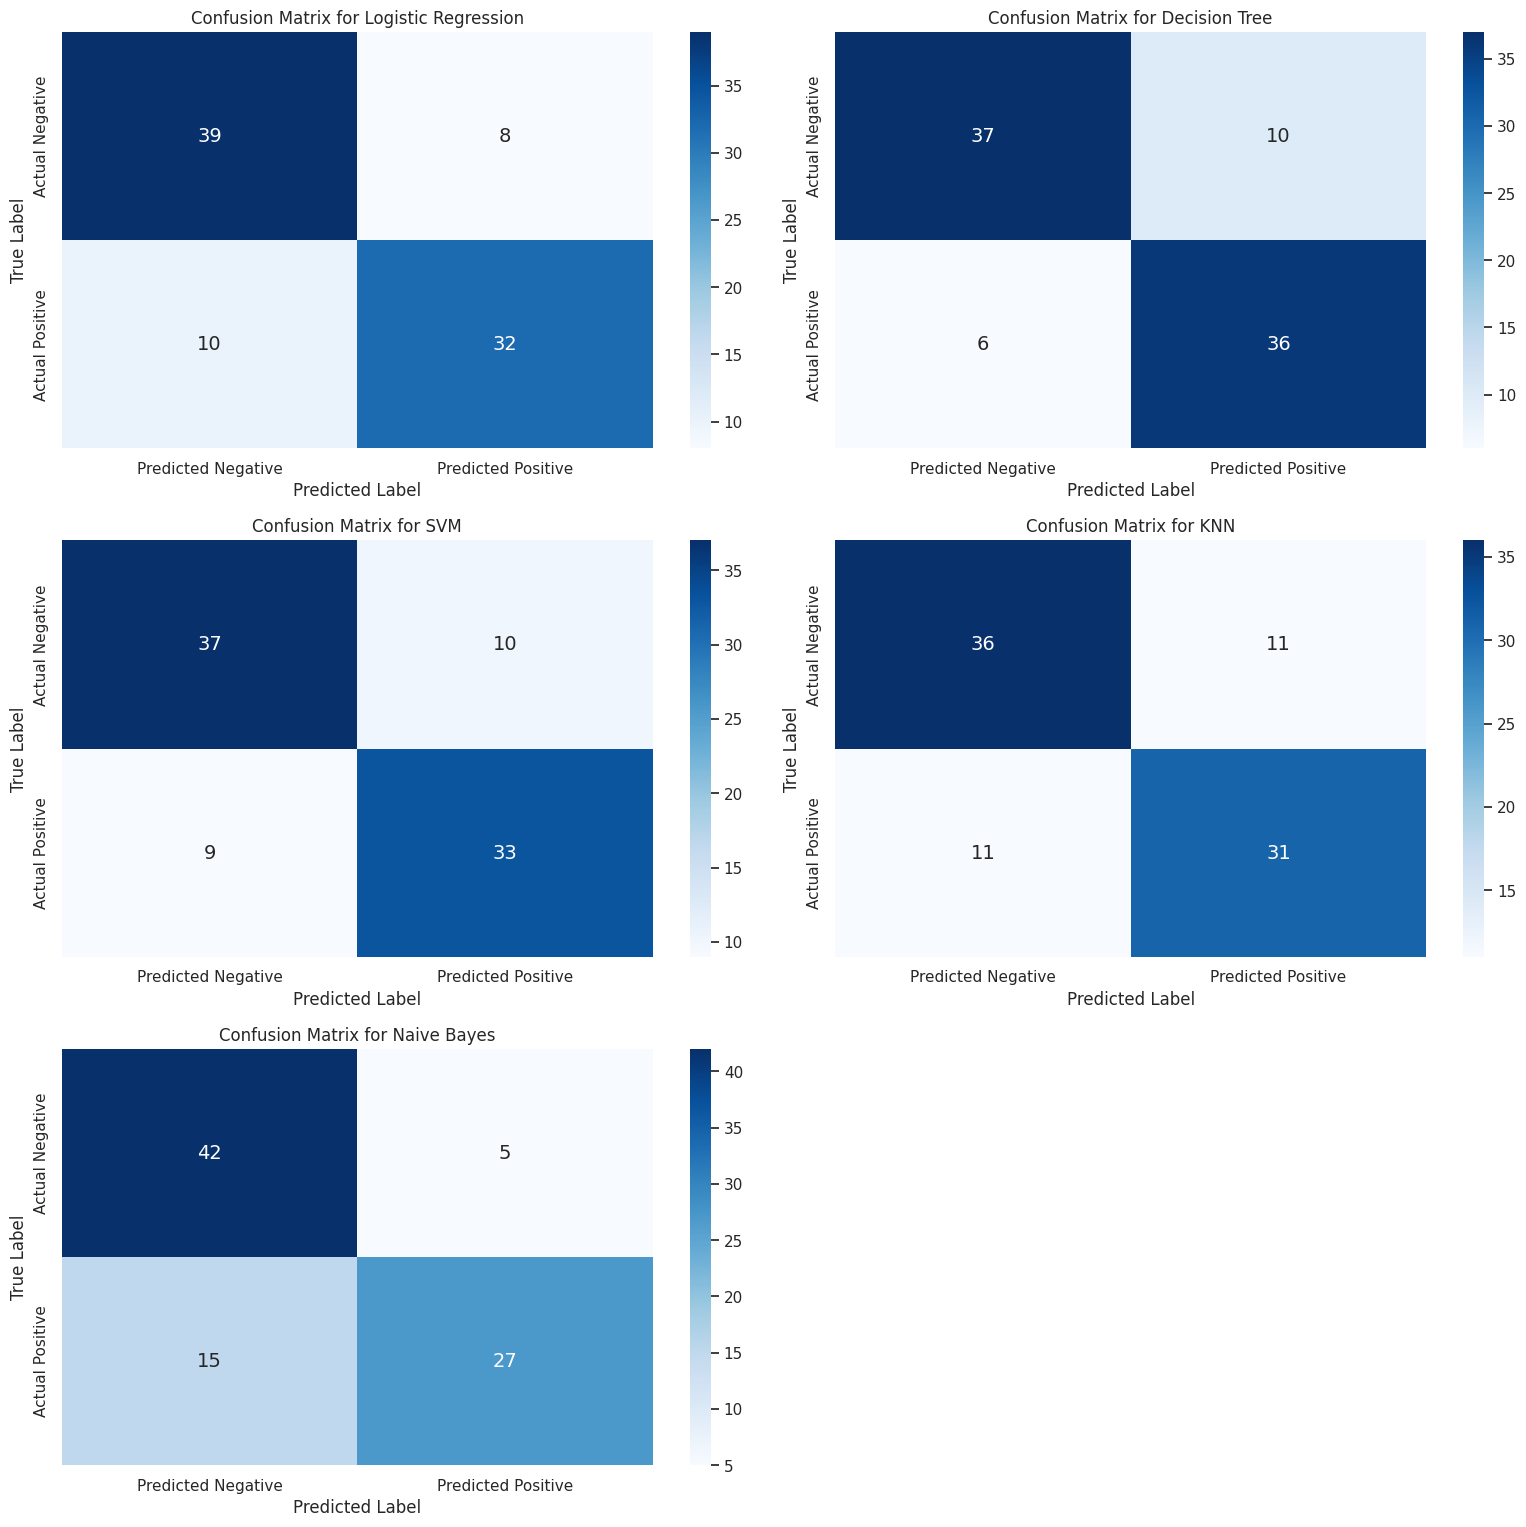

In [330]:
# Calculate the number of rows needed for subplots based on the number of models
n_cols = 2
n_rows = (7 + n_cols - 1) // n_cols  # Adjusted for 7 models

# Adjust the size of the entire figure (width, height)
fig_width = 8 * n_cols
fig_height = 5 * n_rows
plt.figure(figsize=(fig_width, fig_height))

# Adjust font size for the numbers inside each quadrant of the confusion matrices
number_font_size = 14

# Enumerate through the models and plot the confusion matrices in subplots
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)  # Generate predictions
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix

    # Add a new subplot iteratively
    ax = plt.subplot(n_rows, n_cols, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'],
                annot_kws={"size": number_font_size}, ax=ax)  # Adjust font size here
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


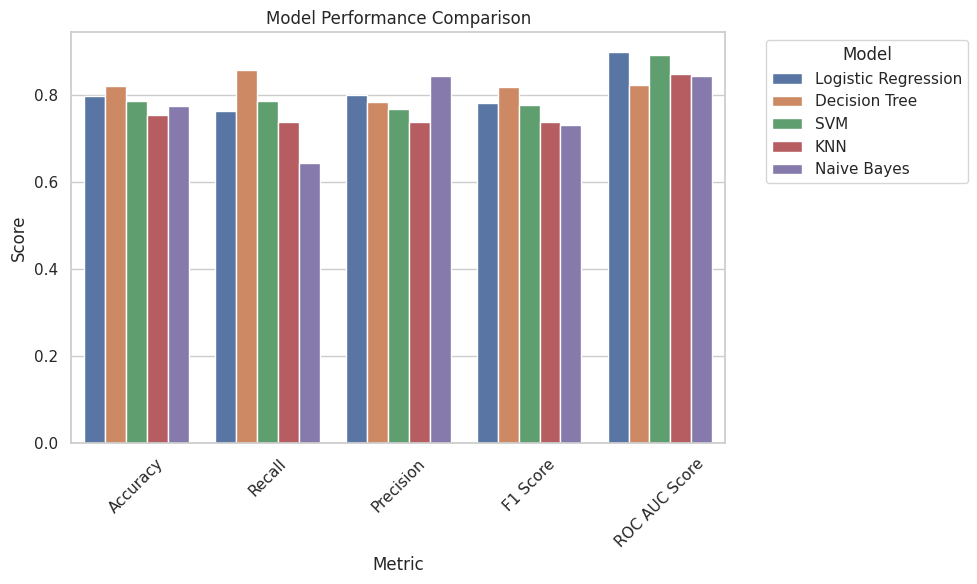

In [331]:
# Melting the DataFrame to make it suitable for seaborn's barplot
melted_df = df_results_base.melt(id_vars=["Classifier"], var_name="Metric", value_name="Score")
melted_df['Metric'] = melted_df['Metric'].str.replace(' Avg', '')  # Clean up the metric names

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Classifier')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

----------------------------------------------------------------------------------------
# Training and Testing Base Classifiers using StratifiedKFold Cross Validation

In [332]:
# Initialise
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the models
models = initialise_models()

# Prepare a list to collect results for each model
results = []
# Dictionary to store aggregated confusion matrices
conf_matrices = {}

# Perform Stratified K-Fold CV and evaluate each model
for name, model in models.items():
    # Initialize storage for metrics
    metrics = {'Classifier': name, 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1 Score': [], 'ROC AUC Score': []}
    # Initialize an empty array for the aggregated confusion matrix
    agg_conf_matrix = np.zeros((2, 2), dtype=int)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

        # Calculate confusion matrix for the current fold and add it to the aggregate matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        agg_conf_matrix += conf_matrix

        # Append metrics for this fold
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))
        metrics['F1 Score'].append(f1_score(y_test, y_pred))
        metrics['ROC AUC Score'].append(roc_auc_score(y_test, y_proba))

    # Compute average of each metric across folds and update the metrics dict for the model
    for metric in metrics.keys():
        if metric != 'Classifier':
            metrics[metric] = np.mean(metrics[metric])  # Calculate mean of metrics across folds

    results.append(metrics)
    # Store the aggregated confusion matrix in the dictionary
    conf_matrices[name] = agg_conf_matrix

# Convert results to DataFrame
df_results_stratified = pd.DataFrame(results)

# Display the DataFrame
df_results_stratified


,Classifier,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
0,Logistic Regression,0.839860,0.810256,0.837734,0.821503,0.914001
1,Decision Tree,0.768790,0.750997,0.740328,0.744285,0.767544
2,SVM,0.659906,0.439031,0.696749,0.535343,0.747603
3,KNN,0.666686,0.613105,0.633237,0.620596,0.697851
4,Naive Bayes,0.839801,0.787464,0.850908,0.815812,0.882305


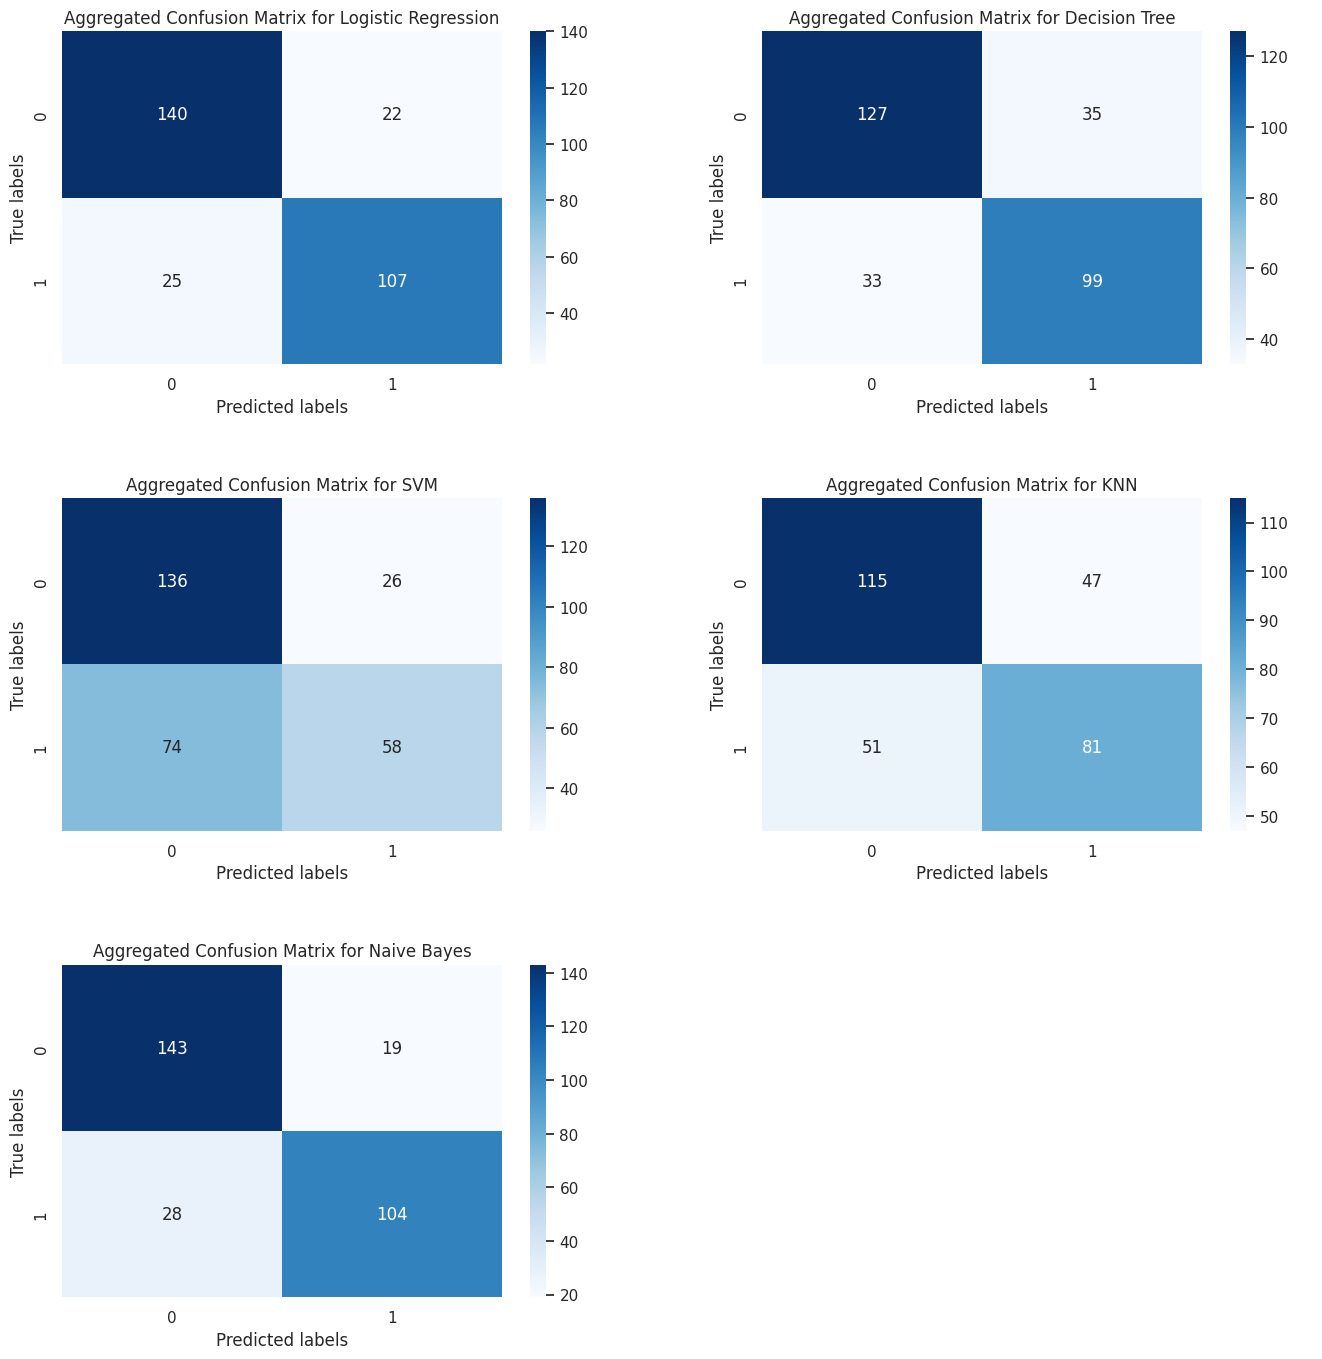

In [333]:
# Create a figure with subplots in 2 columns for 5 classifiers
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust figsize as needed
fig.tight_layout(pad=6.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the dictionary and plot each confusion matrix
for idx, (classifier, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Aggregated Confusion Matrix for {classifier}')
    axes[idx].set_xlabel('Predicted labels')
    axes[idx].set_ylabel('True labels')

# Hide the unused subplot (last one in this case)
axes[-1].axis('off')

# Show the plot
plt.show()


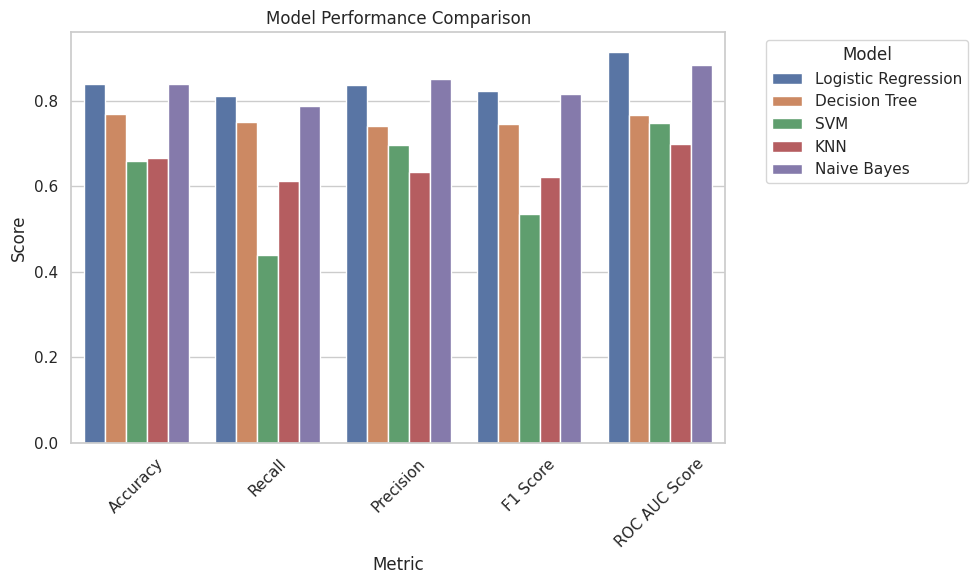

In [334]:
# Melting the DataFrame to make it suitable for seaborn's barplot
melted_df = df_results_stratified.melt(id_vars=["Classifier"], var_name="Metric", value_name="Score")
melted_df['Metric'] = melted_df['Metric'].str.replace(' Avg', '')  # Clean up the metric names

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Classifier')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

----------------------------------------------------------------------------------------
# Training and Testing Ensemble Classifiers using StratifiedKFold Cross Validation

In [335]:
# Initialize the ensemble models
ensemble_models = initialise_ensemble()

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare a list to collect summary results and a dictionary to store confusion matrices
results = []
conf_matrices = {}

# Perform Stratified K-Fold Cross Validation and evaluate models
for name, model in ensemble_models.items():
    agg_conf_matrix = np.zeros((2, 2), dtype=int)  # Assuming binary classification for the confusion matrix size
    scores = {metric: [] for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']}

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate and accumulate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        agg_conf_matrix += conf_matrix

        # Calculate scores for this fold
        scores['accuracy'].append(accuracy_score(y_test, y_pred))
        scores['precision_weighted'].append(precision_score(y_test, y_pred, average='weighted'))
        scores['recall_weighted'].append(recall_score(y_test, y_pred, average='weighted'))
        scores['f1_weighted'].append(f1_score(y_test, y_pred, average='weighted'))
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            scores['roc_auc'].append(roc_auc_score(y_test, y_proba))

    # Prepare a summary for the current model with average scores
    model_summary = {metric: np.mean(values) for metric, values in scores.items() if values}
    model_summary['Model'] = name

    # Append the summary to the results list
    results.append(model_summary)
    # Store the aggregated confusion matrix
    conf_matrices[name] = agg_conf_matrix

# Convert the results list to a DataFrame for easier viewing
results_df_ensemble = pd.DataFrame(results)

# Set 'Model' as the index of the DataFrame
results_df_ensemble.set_index('Model', inplace=True)

# Display the DataFrame
results_df_ensemble


,accuracy,precision_weighted,recall_weighted,f1_weighted,roc_auc
Model,,,,,
Random Forest,0.829749,0.831412,0.829749,0.829561,0.915865
Hard Voting Classifier,0.792344,0.797998,0.792344,0.791356,NaN


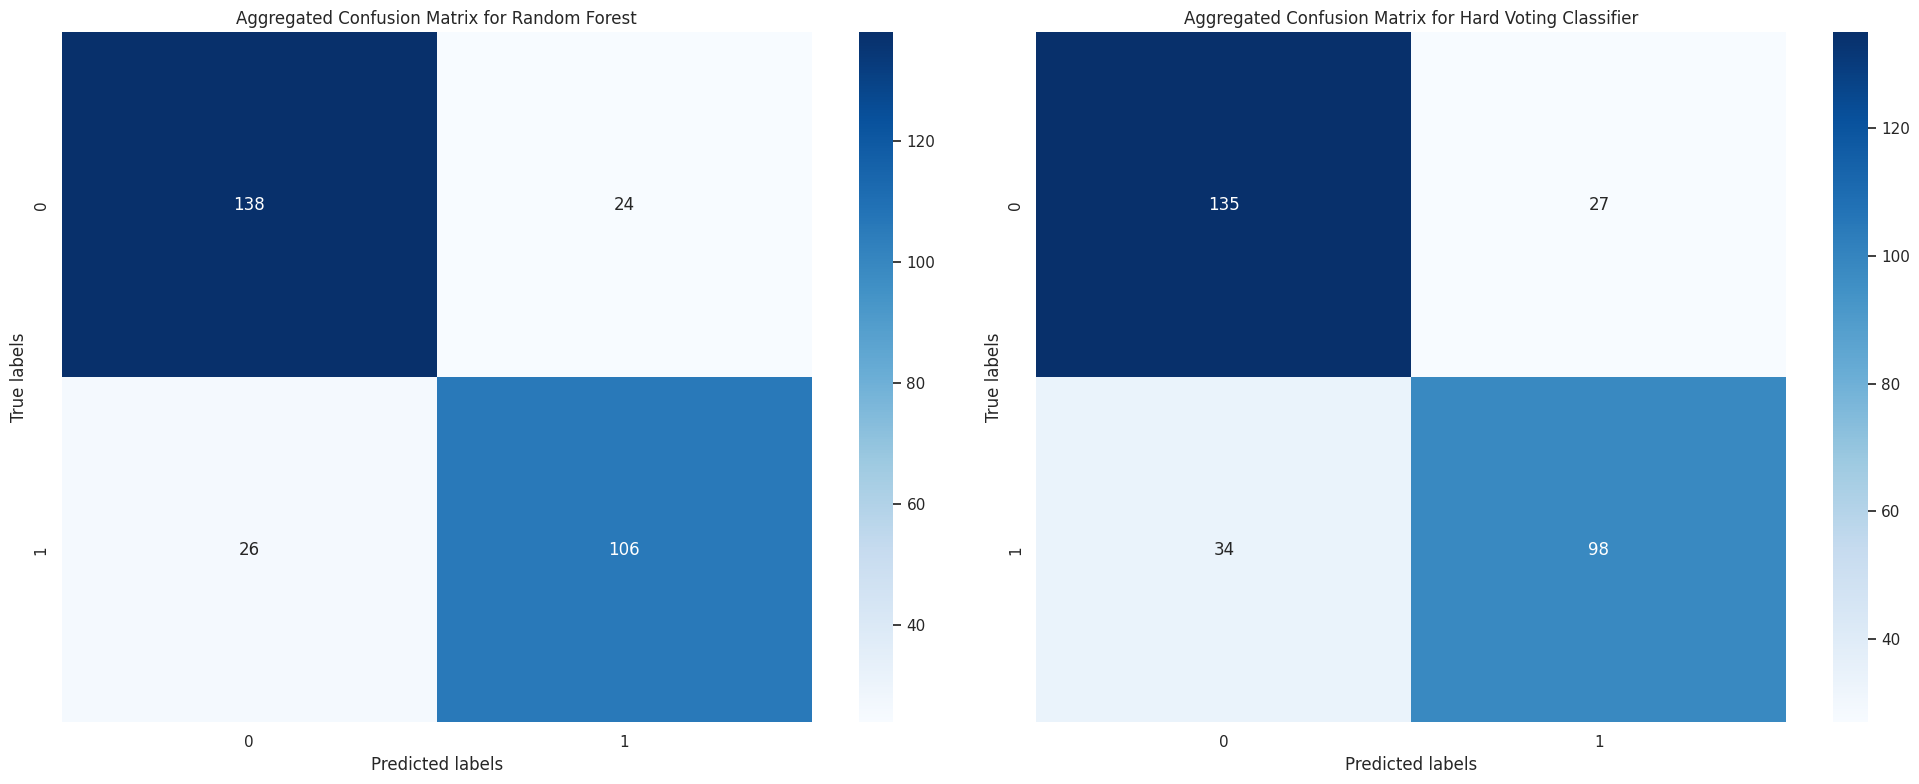

In [336]:
n_classifiers = len(conf_matrices)
fig, axes = plt.subplots(1, n_classifiers, figsize=(10 * n_classifiers, 8))  # Adjust figsize as needed

if n_classifiers == 1:  # In case there's only one classifier, axes will not be an array
    axes = [axes]

for idx, (classifier, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Aggregated Confusion Matrix for {classifier}')
    axes[idx].set_xlabel('Predicted labels')
    axes[idx].set_ylabel('True labels')

plt.tight_layout()
plt.show()


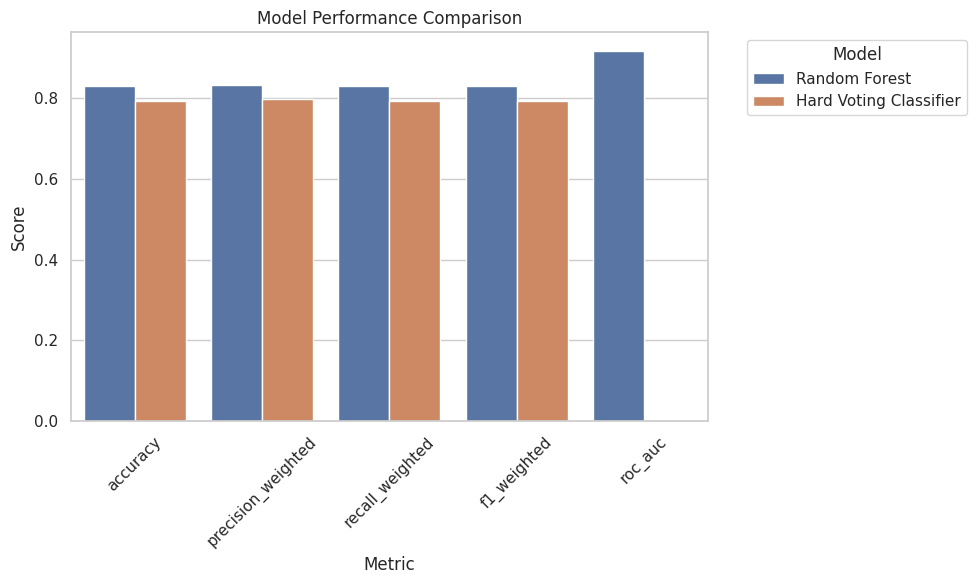

In [337]:
# Reset the index to turn 'Model' back into a column
results_df_ensemble_reset = results_df_ensemble.reset_index()

# Melting the DataFrame to make it suitable for seaborn's barplot
melted_df = results_df_ensemble_reset.melt(id_vars=["Model"], var_name="Metric", value_name="Score")
melted_df['Metric'] = melted_df['Metric'].str.replace(' Avg', '')  # Clean up the metric names

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


----------------------------------------------------------------------------------------
# Running PCA on the Dataset for Dimensionality Reduction

In [338]:
# Standardize the data
scaler = StandardScaler()
scaled_hd = scaler.fit_transform(hd)

# Apply PCA to retain 20 principal components
pca = PCA(n_components=20)  # Adjusted to retain 20 components
principal_components_hd = pca.fit_transform(scaled_hd)

# Create a new DataFrame with the 20 principal components
pca_hd_df = pd.DataFrame(data=principal_components_hd,
                         columns=[f'Principal Component {i}' for i in range(1, 21)])

# Examine the variance explained by each of the 20 components
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.19340711 0.08495018 0.08028297 0.06474153 0.06195826 0.05535705
 0.05063726 0.04442295 0.04405348 0.04208516 0.0385126  0.03484076
 0.03253314 0.03003588 0.0285537  0.02662109 0.02373554 0.02216611
 0.01540531 0.01371944]


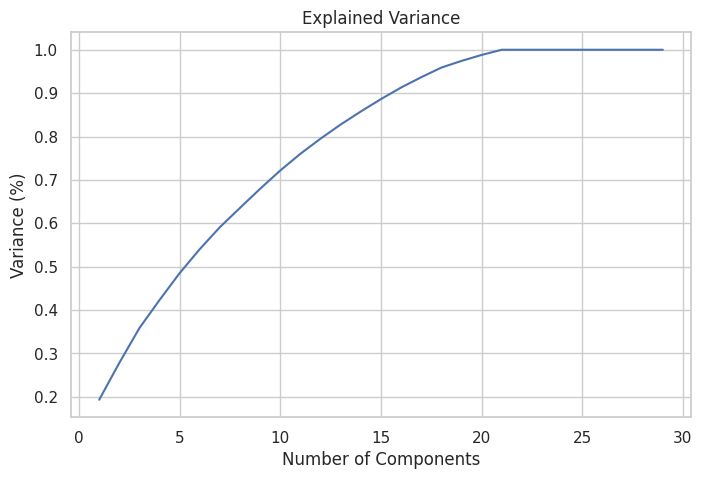

In [339]:
pca = PCA().fit(scaled_hd)
explained_var_ratio = pca.explained_variance_ratio_

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), np.cumsum(explained_var_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()


## Set new train and test set for PCA

In [340]:
# Combine all models
all_models = {**initialise_models(), **initialise_ensemble()}

# Perform Stratified K-Fold CV and evaluate each model
results = []
conf_matrices = {}  # Dictionary to store confusion matrices
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in all_models.items():
    agg_conf_matrix = np.zeros((2, 2), dtype=int)  # Assuming binary classification
    scores = []

    for train_index, test_index in skf.split(pca_hd_df, y):
        X_train, X_test = pca_hd_df.iloc[train_index], pca_hd_df.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate and accumulate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        agg_conf_matrix += conf_matrix

        # Calculate metrics
        scores.append({
            'accuracy': accuracy_score(y_test, y_pred),
            'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
            'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
            'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, 'predict_proba') else None
        })

    # Aggregate scores
    results.append({
        'Model': name,
        'Accuracy': np.mean([score['accuracy'] for score in scores]),
        'Precision (Weighted)': np.mean([score['precision_weighted'] for score in scores]),
        'Recall (Weighted)': np.mean([score['recall_weighted'] for score in scores]),
        'F1 Score (Weighted)': np.mean([score['f1_weighted'] for score in scores]),
        'ROC AUC Score': np.mean([score['roc_auc'] for score in scores if score['roc_auc'] is not None])
    })
    # Store the aggregated confusion matrix
    conf_matrices[name] = agg_conf_matrix

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)

results_df


,Model,Accuracy,Precision (Weighted),Recall (Weighted),F1 Score (Weighted),ROC AUC Score
0,Logistic Regression,0.959147,0.960448,0.959147,0.959124,0.993153
1,Decision Tree,0.863881,0.864460,0.863881,0.863656,0.861127
2,SVM,0.948919,0.951055,0.948919,0.948812,0.986339
3,KNN,0.880888,0.885180,0.880888,0.880112,0.938764
4,Naive Bayes,0.890883,0.895998,0.890883,0.890878,0.952942
5,Random Forest,0.921625,0.924202,0.921625,0.921546,0.976810
6,Hard Voting Classifier,0.938866,0.940834,0.938866,0.938610,NaN


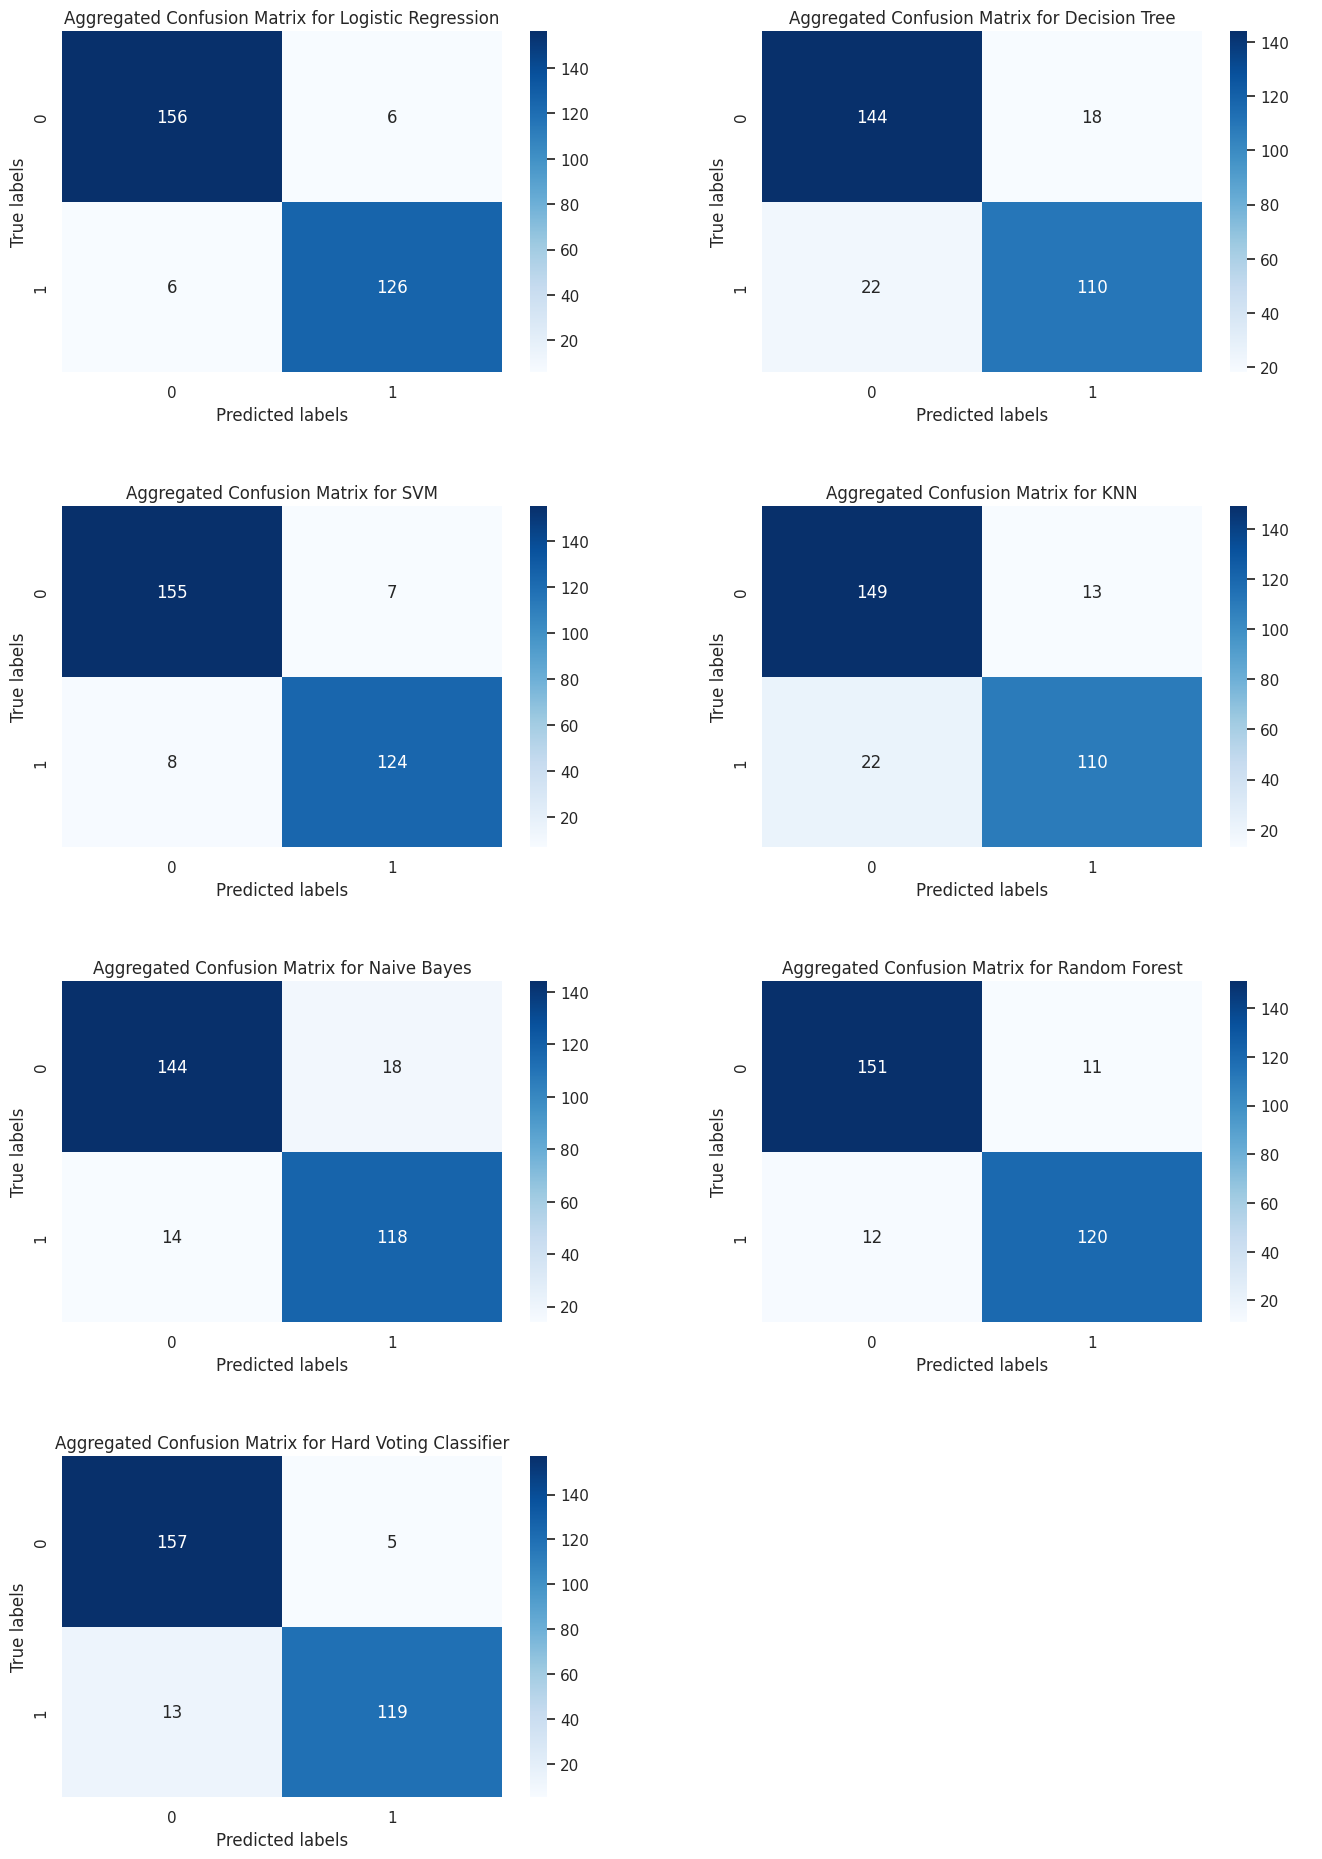

In [341]:
# Create a figure with subplots in 2 columns for 7 classifiers (which requires 4 rows to accommodate all)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Adjust figsize as needed
fig.tight_layout(pad=6.0)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the dictionary and plot each confusion matrix
for idx, (classifier, matrix) in enumerate(conf_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Aggregated Confusion Matrix for {classifier}')
    axes[idx].set_xlabel('Predicted labels')
    axes[idx].set_ylabel('True labels')

# Hide any unused subplots (there will be one unused subplot in this case)
for idx in range(len(conf_matrices), len(axes)):
    axes[idx].axis('off')

# Show the plot
plt.show()


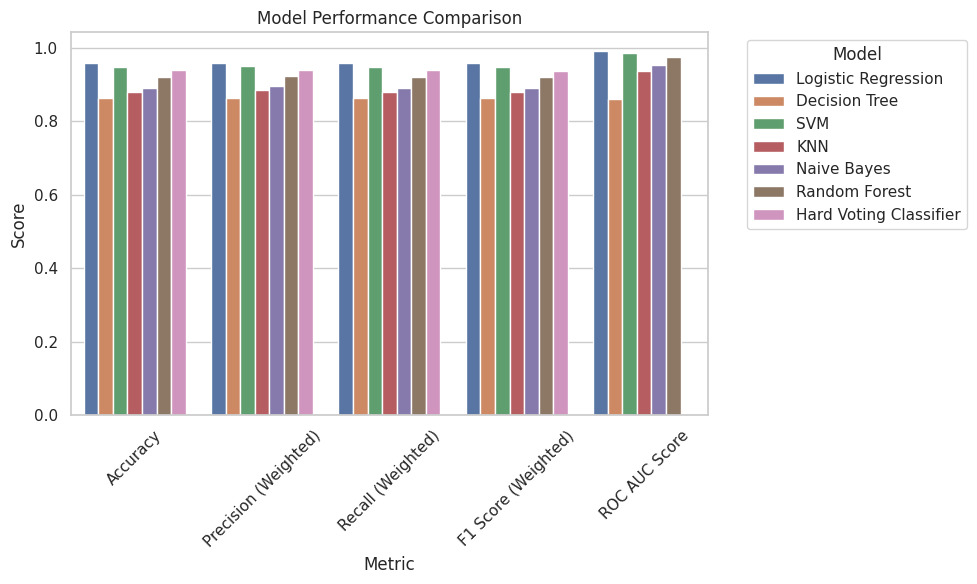

In [342]:
# Melting the DataFrame to make it suitable for seaborn's barplot
melted_df = results_df.melt(id_vars=["Model"], var_name="Metric", value_name="Score")
melted_df['Metric'] = melted_df['Metric'].str.replace(' Avg', '')  # Clean up the metric names

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()

# ROC Curve for PCA dataset for all models

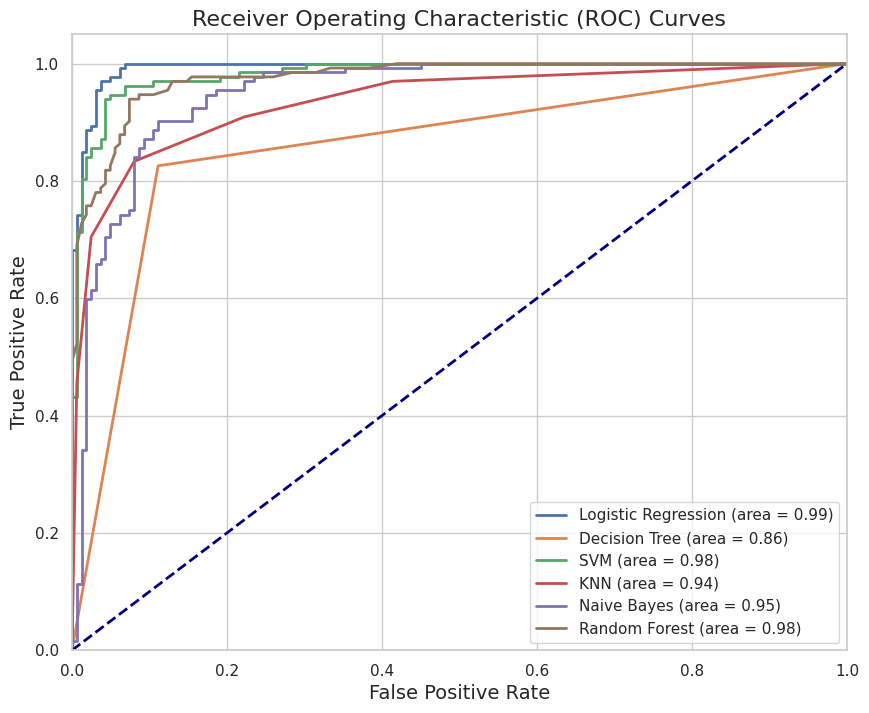

In [343]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import numpy as np

# loop to plot ROC curves
plt.figure(figsize=(10, 8))  # Set figure size

for name, model in all_models.items():
    # Skipping models that don't support predict_proba
    if hasattr(model, "predict_proba"):
        # Stratified K-Fold cross-validation
        y_scores = cross_val_predict(model, pca_hd_df, y, cv=skf, method='predict_proba')[:, 1]

        fpr, tpr, _ = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label='%s (area = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=16)
plt.legend(loc="lower right")
plt.grid(True)  # Adding grid
plt.show()
